In [166]:
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

In [169]:
df = pd.read_csv('esg_data.csv')

In [170]:
df

,NO,기업명,기업코드,ESG등급,환경,사회,지배구조,년도,첨부
0,2116,AJ네트웍스,95570,B+,C,A,B+,2023,pdf 다운로드
1,2115,AJ네트웍스,95570,B+,C,A,B+,2024,pdf 다운로드
2,2114,AK홀딩스,6840,A,A,A+,B+,2023,pdf 다운로드
3,2113,AK홀딩스,6840,A,A,A+,B+,2024,pdf 다운로드
4,2112,BGF,27410,A,A,A+,B+,2023,pdf 다운로드
...,...,...,...,...,...,...,...,...,...
2110,5,흥국생명보험,818586,등급없음,등급없음,등급없음,B,2024,NaN
2111,4,흥국화재,540,B+,B,B+,B+,2023,pdf 다운로드
2112,3,흥국화재,540,B+,C,B+,B+,2024,pdf 다운로드
2113,2,흥아해운,3280,B,B,B+,B,2023,pdf 다운로드


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      2115 non-null   int64 
 1   기업명     2115 non-null   object
 2   기업코드    2115 non-null   int64 
 3   ESG등급   2115 non-null   object
 4   환경      2115 non-null   object
 5   사회      2115 non-null   object
 6   지배구조    2115 non-null   object
 7   년도      2115 non-null   int64 
 8   첨부      1934 non-null   object
dtypes: int64(3), object(6)
memory usage: 148.8+ KB


In [174]:
expected = set(range(1, 2117))  # 1부터 2116까지
print(len(expected))

df["NO"] = df["NO"].astype(int)
actual = set(df["NO"])
print(len(actual))
missing = sorted(expected - actual)

print("❗ 누락된 NO 번호:", missing)

2116
2115
❗ 누락된 NO 번호: [1003]


In [176]:
df["년도"] = df["년도"].astype(int)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      2115 non-null   int32 
 1   기업명     2115 non-null   object
 2   기업코드    2115 non-null   int64 
 3   ESG등급   2115 non-null   object
 4   환경      2115 non-null   object
 5   사회      2115 non-null   object
 6   지배구조    2115 non-null   object
 7   년도      2115 non-null   int32 
 8   첨부      1934 non-null   object
dtypes: int32(2), int64(1), object(6)
memory usage: 132.3+ KB


In [178]:
# 년도를 비교하기 위해 기업명에 중복된 항목을 가진 기업들만 남긴다.
# 1. 종목명별로 연도 개수 세기
counts = df.groupby("기업명")["년도"].nunique().reset_index()
counts = counts[counts["년도"] == 2]  # 2023, 2024 둘 다 있는 기업만 남김

In [180]:
counts.head()
len(counts)

993

In [181]:
# 2. 종목명 기준으로 inner join (두 연도 다 있는 기업만 추출)
df_esg_cleaned = df[df["기업명"].isin(counts["기업명"])]

In [183]:
df_esg_cleaned

,NO,기업명,기업코드,ESG등급,환경,사회,지배구조,년도,첨부
0,2116,AJ네트웍스,95570,B+,C,A,B+,2023,pdf 다운로드
1,2115,AJ네트웍스,95570,B+,C,A,B+,2024,pdf 다운로드
2,2114,AK홀딩스,6840,A,A,A+,B+,2023,pdf 다운로드
3,2113,AK홀딩스,6840,A,A,A+,B+,2024,pdf 다운로드
4,2112,BGF,27410,A,A,A+,B+,2023,pdf 다운로드
...,...,...,...,...,...,...,...,...,...
2110,5,흥국생명보험,818586,등급없음,등급없음,등급없음,B,2024,NaN
2111,4,흥국화재,540,B+,B,B+,B+,2023,pdf 다운로드
2112,3,흥국화재,540,B+,C,B+,B+,2024,pdf 다운로드
2113,2,흥아해운,3280,B,B,B+,B,2023,pdf 다운로드


In [184]:
# 그리고 등급없음에 해당되는 기업들은 다 삭제시킨다.
# 제거 대상 열 리스트
target_cols = ["ESG등급", "환경", "사회", "지배구조"]

# '등급없음'이 하나라도 포함된 행 제거
df_esg_cleaned = df_esg_cleaned[~df_esg_cleaned[target_cols].isin(["등급없음"]).any(axis=1)]


In [187]:
# 각 열별로 '등급없음'이 존재하는지 확인
for col in target_cols:
    has_no_grade = df_esg_cleaned[col].str.contains("등급없음", na=False).any()
    print(f"[{col}]에 '등급없음' 포함 여부: {has_no_grade}")

[ESG등급]에 '등급없음' 포함 여부: False
[환경]에 '등급없음' 포함 여부: False
[사회]에 '등급없음' 포함 여부: False
[지배구조]에 '등급없음' 포함 여부: False


In [188]:
df_esg_cleaned.info()
# 행 개수가 1986개에서 등급없음 행들이 없어지니 1868개로 줄어들었다.

<class 'pandas.core.frame.DataFrame'>
Index: 1868 entries, 0 to 2114
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NO      1868 non-null   int32 
 1   기업명     1868 non-null   object
 2   기업코드    1868 non-null   int64 
 3   ESG등급   1868 non-null   object
 4   환경      1868 non-null   object
 5   사회      1868 non-null   object
 6   지배구조    1868 non-null   object
 7   년도      1868 non-null   int32 
 8   첨부      1814 non-null   object
dtypes: int32(2), int64(1), object(6)
memory usage: 131.3+ KB


In [192]:
# 총 10개의 기업별 종가 데이터를 불러온다.

# 2024년 ESG 등급 발표 전 종가 데터터
df_20241017_jongga = pd.read_csv('20241017_종가.csv', encoding="cp949")
df_20241018_jongga = pd.read_csv('20241018_종가.csv', encoding="cp949")
df_20241021_jongga = pd.read_csv('20241021_종가.csv', encoding="cp949")
df_20241022_jongga = pd.read_csv('20241022_종가.csv', encoding="cp949")
df_20241023_jongga = pd.read_csv('20241023_종가.csv', encoding="cp949")

# 2024년 ESG 등급 발표 후 종가 데이터
df_20241025_jongga = pd.read_csv('20241025_종가.csv', encoding="cp949")
df_20241028_jongga = pd.read_csv('20241028_종가.csv', encoding="cp949")
df_20241029_jongga = pd.read_csv('20241029_종가.csv', encoding="cp949")
df_20241030_jongga = pd.read_csv('20241030_종가.csv', encoding="cp949")
df_20241031_jongga = pd.read_csv('20241031_종가.csv', encoding="cp949")

In [193]:
jongga_datalist = [df_20241017_jongga, df_20241018_jongga, df_20241021_jongga, df_20241022_jongga, df_20241023_jongga, 
                  df_20241025_jongga, df_20241028_jongga, df_20241029_jongga, df_20241030_jongga, df_20241031_jongga]

for df in jongga_datalist:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2547 entries, 0 to 2546
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   종목코드                  2547 non-null   int64 
 1   종목명                   2547 non-null   object
 2   자기주식 제외 시가총액(A*B)     2547 non-null   int64 
 3   종가                    2547 non-null   int64 
 4   자기주식 제외 발행주식수(B=C-D)  2547 non-null   int64 
 5   총발행주식수(C)             2547 non-null   int64 
 6   자기주식수(D)              2547 non-null   int64 
 7   자기주식수 반영시점            2547 non-null   object
dtypes: int64(6), object(2)
memory usage: 159.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2549 entries, 0 to 2548
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   종목코드                  2549 non-null   int64  
 1   종목명                   2549 non-null   object 
 2   자기주식 제외 시가총액(A*B)     

### 대부분 하나의 데이터 프레임에 2550 개의 기업들이 있지만 현재 ESG 등급 데이터 프레임에 존재하는
### 기업들의 종가만을 이용해야 하므로 ESG 등급 데이터 프레임에 종가데이터를 
### 기업명에 맞춰서 넣어준다.
### 그리고 기업명과 종가 정보만 필용하므로 해당 열들만 추출해준다.

In [199]:
for i in range(len(jongga_datalist)):
    df = jongga_datalist[i][['종목명', '종가']].copy()
    df.rename(columns={'종목명': '기업명'}, inplace=True)
    jongga_datalist[i] = df

In [200]:
for df in jongga_datalist:
    print(df.head())

      기업명     종가
0      3S   2065
1  AJ네트웍스   4850
2   AK홀딩스  13190
3     APS   5960
4   AP시스템  18400
      기업명     종가
0      3S   2055
1  AJ네트웍스   4830
2   AK홀딩스  12770
3     APS   5980
4   AP시스템  17570
      기업명     종가
0      3S   2070
1  AJ네트웍스   4845
2   AK홀딩스  12530
3     APS   5960
4   AP시스템  17980
      기업명     종가
0      3S   2025
1  AJ네트웍스   4860
2   AK홀딩스  12730
3     APS   6000
4   AP시스템  17580
      기업명     종가
0      3S   2165
1  AJ네트웍스   4795
2   AK홀딩스  12980
3     APS   6200
4   AP시스템  17890
      기업명     종가
0      3S   2055
1  AJ네트웍스   4855
2   AK홀딩스  12230
3     APS   6240
4   AP시스템  17210
      기업명     종가
0      3S   2110
1  AJ네트웍스   4900
2   AK홀딩스  12280
3     APS   6330
4   AP시스템  17560
      기업명     종가
0      3S   2145
1  AJ네트웍스   4910
2   AK홀딩스  12160
3     APS   6370
4   AP시스템  17480
      기업명     종가
0      3S   2120
1  AJ네트웍스   4910
2   AK홀딩스  12380
3     APS   6350
4   AP시스템  17740
      기업명     종가
0      3S   2120
1  AJ네트웍스   4890
2   AK홀딩스  12500
3     APS   62

In [203]:
df_20241017_jongga.head()

,종목코드,종목명,자기주식 제외 시가총액(A*B),종가,자기주식 제외 발행주식수(B=C-D),총발행주식수(C),자기주식수(D),자기주식수 반영시점
0,60310,3S,105489785730,2065,51084642,51084642,0,2024-09
1,95570,AJ네트웍스,217042592500,4850,44751050,45252759,501709,2024-09
2,6840,AK홀딩스,172070079050,13190,13045495,13247561,202066,2024-09
3,54620,APS,108289886240,5960,18169444,19894221,1724777,2024-09
4,265520,AP시스템,276370465600,18400,15020134,15281421,261287,2024-09


In [204]:
df_esg_cleaned

# ESG 기준 데이터프레임
df_esg_cleaned = df_esg_cleaned[['기업명', 'ESG등급', '환경', '사회', '지배구조', '년도']]

# 종가 데이터프레임 리스트: [(날짜문자열, 종가_df), ...]
# 예: [("20241025", df_20241025_jongga), ("20241101", df_20241101_jongga)]
jongga_datalist = [("20241017", df_20241017_jongga),
                   ("20241018", df_20241018_jongga),
                   ("20241021", df_20241021_jongga),
                   ("20241022", df_20241022_jongga),
                   ("20241023", df_20241023_jongga),
                   ("20241025", df_20241025_jongga),
                   ("20241028", df_20241028_jongga),
                   ("20241029", df_20241029_jongga),
                   ("20241030", df_20241030_jongga),
                   ("20241031", df_20241031_jongga)]

# 반복적으로 ESG 데이터프레임에 병합
for date_str, df in jongga_datalist:
    # 1. 필요한 열만 선택
    df.rename(columns={'종목명': '기업명'}, inplace=True)
    df = df[['기업명', '종가']].copy()
    
    # 2. 종가 열 이름 변경
    df.rename(columns={'종가': f'{date_str}_종가'}, inplace=True)
    
    # 3. 종목명 기준으로 ESG 데이터프레임과 병합
    df_esg_cleaned = df_esg_cleaned.merge(df, on='기업명', how='left')  # 또는 inner, 필요에 따라 조절

In [205]:
df_esg_cleaned.head()

,기업명,ESG등급,환경,사회,지배구조,년도,20241017_종가,20241018_종가,20241021_종가,20241022_종가,20241023_종가,20241025_종가,20241028_종가,20241029_종가,20241030_종가,20241031_종가
0,AJ네트웍스,B+,C,A,B+,2023,4850.0,4830.0,4845.0,4860.0,4795.0,4855.0,4900.0,4910.0,4910.0,4890.0
1,AJ네트웍스,B+,C,A,B+,2024,4850.0,4830.0,4845.0,4860.0,4795.0,4855.0,4900.0,4910.0,4910.0,4890.0
2,AK홀딩스,A,A,A+,B+,2023,13190.0,12770.0,12530.0,12730.0,12980.0,12230.0,12280.0,12160.0,12380.0,12500.0
3,AK홀딩스,A,A,A+,B+,2024,13190.0,12770.0,12530.0,12730.0,12980.0,12230.0,12280.0,12160.0,12380.0,12500.0
4,BGF,A,A,A+,B+,2023,3605.0,3645.0,3625.0,3595.0,3620.0,3570.0,3525.0,3570.0,3595.0,3605.0


In [206]:
df_esg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기업명          1868 non-null   object 
 1   ESG등급        1868 non-null   object 
 2   환경           1868 non-null   object 
 3   사회           1868 non-null   object 
 4   지배구조         1868 non-null   object 
 5   년도           1868 non-null   int32  
 6   20241017_종가  1766 non-null   float64
 7   20241018_종가  1766 non-null   float64
 8   20241021_종가  1766 non-null   float64
 9   20241022_종가  1766 non-null   float64
 10  20241023_종가  1766 non-null   float64
 11  20241025_종가  1766 non-null   float64
 12  20241028_종가  1766 non-null   float64
 13  20241029_종가  1766 non-null   float64
 14  20241030_종가  1766 non-null   float64
 15  20241031_종가  1766 non-null   float64
dtypes: float64(10), int32(1), object(5)
memory usage: 226.3+ KB


In [207]:
# 각 열에서 null값을 파악한다.
null_counts = df_esg_cleaned.isnull().sum()
print(null_counts[null_counts > 0])

20241017_종가    102
20241018_종가    102
20241021_종가    102
20241022_종가    102
20241023_종가    102
20241025_종가    102
20241028_종가    102
20241029_종가    102
20241030_종가    102
20241031_종가    102
dtype: int64


In [208]:
null_rows = df_esg_cleaned[df_esg_cleaned.isnull().any(axis=1)]
null_rows
# 종가가 없는 기업은 전체 일자에 대해서 전부 종가가 공통적으로 없는 것을 확인할 수 있다.

,기업명,ESG등급,환경,사회,지배구조,년도,20241017_종가,20241018_종가,20241021_종가,20241022_종가,20241023_종가,20241025_종가,20241028_종가,20241029_종가,20241030_종가,20241031_종가
52,F&F 홀딩스,A,B+,A+,B+,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,F&F 홀딩스,A,A+,A+,A,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326,계룡건설산업,B+,B+,B+,B,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327,계룡건설산업,B,B+,C,B+,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,금호석유화학,A,A,A+,A,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,화승인더스트리,B+,B+,A,B+,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1844,효성 ITX,B+,B+,A+,B,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1845,효성 ITX,A,A,A+,A,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1854,휴니드테크놀러지스,D,C,D,D,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [210]:
df_esg_cleaned = df_esg_cleaned.dropna()

In [212]:
df_esg_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 0 to 1867
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기업명          1766 non-null   object 
 1   ESG등급        1766 non-null   object 
 2   환경           1766 non-null   object 
 3   사회           1766 non-null   object 
 4   지배구조         1766 non-null   object 
 5   년도           1766 non-null   int32  
 6   20241017_종가  1766 non-null   float64
 7   20241018_종가  1766 non-null   float64
 8   20241021_종가  1766 non-null   float64
 9   20241022_종가  1766 non-null   float64
 10  20241023_종가  1766 non-null   float64
 11  20241025_종가  1766 non-null   float64
 12  20241028_종가  1766 non-null   float64
 13  20241029_종가  1766 non-null   float64
 14  20241030_종가  1766 non-null   float64
 15  20241031_종가  1766 non-null   float64
dtypes: float64(10), int32(1), object(5)
memory usage: 227.6+ KB


In [213]:
null_rows = df_esg_cleaned[df_esg_cleaned.isnull().any(axis=1)]
null_rows
# 이제는 null값이 없음을 확인할 수 있다.

,기업명,ESG등급,환경,사회,지배구조,년도,20241017_종가,20241018_종가,20241021_종가,20241022_종가,20241023_종가,20241025_종가,20241028_종가,20241029_종가,20241030_종가,20241031_종가


In [214]:
df_esg_cleaned.head()

,기업명,ESG등급,환경,사회,지배구조,년도,20241017_종가,20241018_종가,20241021_종가,20241022_종가,20241023_종가,20241025_종가,20241028_종가,20241029_종가,20241030_종가,20241031_종가
0,AJ네트웍스,B+,C,A,B+,2023,4850.0,4830.0,4845.0,4860.0,4795.0,4855.0,4900.0,4910.0,4910.0,4890.0
1,AJ네트웍스,B+,C,A,B+,2024,4850.0,4830.0,4845.0,4860.0,4795.0,4855.0,4900.0,4910.0,4910.0,4890.0
2,AK홀딩스,A,A,A+,B+,2023,13190.0,12770.0,12530.0,12730.0,12980.0,12230.0,12280.0,12160.0,12380.0,12500.0
3,AK홀딩스,A,A,A+,B+,2024,13190.0,12770.0,12530.0,12730.0,12980.0,12230.0,12280.0,12160.0,12380.0,12500.0
4,BGF,A,A,A+,B+,2023,3605.0,3645.0,3625.0,3595.0,3620.0,3570.0,3525.0,3570.0,3595.0,3605.0


### 우리가 원하는 것은 ESG 등급 발표 시점 전 후로 가장 가까운 5개의 일자에 대해
### 종가의 평균을 원하는 것이므로 전 후 5개의 열 별로 평균 종가를 구한다. 

In [216]:
# 1. 등급 발표 전/후 열 리스트 정의
esg_before_cols = ['20241017_종가', '20241018_종가', '20241021_종가', '20241022_종가', '20241023_종가']
esg_after_cols  = ['20241025_종가', '20241028_종가', '20241029_종가', '20241030_종가', '20241031_종가']

# 2. 평균값 계산하여 새로운 열 추가
df_esg_cleaned["ESG 등급 발표 전"] = df_esg_cleaned[esg_before_cols].mean(axis=1)
df_esg_cleaned["ESG 등급 발표 후"] = df_esg_cleaned[esg_after_cols].mean(axis=1)

In [217]:
df_esg_cleaned.head()

,기업명,ESG등급,환경,사회,지배구조,년도,20241017_종가,20241018_종가,20241021_종가,20241022_종가,20241023_종가,20241025_종가,20241028_종가,20241029_종가,20241030_종가,20241031_종가,ESG 등급 발표 전,ESG 등급 발표 후
0,AJ네트웍스,B+,C,A,B+,2023,4850.0,4830.0,4845.0,4860.0,4795.0,4855.0,4900.0,4910.0,4910.0,4890.0,4836.0,4893.0
1,AJ네트웍스,B+,C,A,B+,2024,4850.0,4830.0,4845.0,4860.0,4795.0,4855.0,4900.0,4910.0,4910.0,4890.0,4836.0,4893.0
2,AK홀딩스,A,A,A+,B+,2023,13190.0,12770.0,12530.0,12730.0,12980.0,12230.0,12280.0,12160.0,12380.0,12500.0,12840.0,12310.0
3,AK홀딩스,A,A,A+,B+,2024,13190.0,12770.0,12530.0,12730.0,12980.0,12230.0,12280.0,12160.0,12380.0,12500.0,12840.0,12310.0
4,BGF,A,A,A+,B+,2023,3605.0,3645.0,3625.0,3595.0,3620.0,3570.0,3525.0,3570.0,3595.0,3605.0,3618.0,3573.0


In [219]:
# 삭제할 열 리스트
drop_cols = esg_before_cols + esg_after_cols

# 해당 열들 삭제
df_esg = df_esg_cleaned.drop(columns=drop_cols)

In [220]:
df_esg.head()

,기업명,ESG등급,환경,사회,지배구조,년도,ESG 등급 발표 전,ESG 등급 발표 후
0,AJ네트웍스,B+,C,A,B+,2023,4836.0,4893.0
1,AJ네트웍스,B+,C,A,B+,2024,4836.0,4893.0
2,AK홀딩스,A,A,A+,B+,2023,12840.0,12310.0
3,AK홀딩스,A,A,A+,B+,2024,12840.0,12310.0
4,BGF,A,A,A+,B+,2023,3618.0,3573.0


In [222]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 0 to 1867
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기업명          1766 non-null   object 
 1   ESG등급        1766 non-null   object 
 2   환경           1766 non-null   object 
 3   사회           1766 non-null   object 
 4   지배구조         1766 non-null   object 
 5   년도           1766 non-null   int32  
 6   ESG 등급 발표 전  1766 non-null   float64
 7   ESG 등급 발표 후  1766 non-null   float64
dtypes: float64(2), int32(1), object(5)
memory usage: 117.3+ KB


# 이제 S~D까지의 등급들을 숫자로 수치화 해준다.

In [225]:
grade_mapping = {
    'S': 7,
    'A+': 6,
    'A': 5,
    'B+': 4,
    'B': 3,
    'C': 2,
    'D': 1
}

grade_cols = ['ESG등급', '환경', '사회', '지배구조']

for col in grade_cols:
    df_esg[col] = df_esg[col].map(grade_mapping)

In [226]:
df_esg

,기업명,ESG등급,환경,사회,지배구조,년도,ESG 등급 발표 전,ESG 등급 발표 후
0,AJ네트웍스,4,2,5,4,2023,4836.0,4893.0
1,AJ네트웍스,4,2,5,4,2024,4836.0,4893.0
2,AK홀딩스,5,5,6,4,2023,12840.0,12310.0
3,AK홀딩스,5,5,6,4,2024,12840.0,12310.0
4,BGF,5,5,6,4,2023,3618.0,3573.0
...,...,...,...,...,...,...,...,...
1863,휴젤,2,2,2,3,2024,282700.0,271300.0
1864,흥국화재,4,3,4,4,2023,3399.0,3420.0
1865,흥국화재,4,2,4,4,2024,3399.0,3420.0
1866,흥아해운,3,3,4,3,2023,2007.6,1911.8


# 이제 크롤링과 전처리과 완료되었다.

# 지금부터 EDA를 해본다.

In [233]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 0 to 1867
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기업명          1766 non-null   object 
 1   ESG등급        1766 non-null   int64  
 2   환경           1766 non-null   int64  
 3   사회           1766 non-null   int64  
 4   지배구조         1766 non-null   int64  
 5   년도           1766 non-null   int32  
 6   ESG 등급 발표 전  1766 non-null   float64
 7   ESG 등급 발표 후  1766 non-null   float64
dtypes: float64(2), int32(1), int64(4), object(1)
memory usage: 117.3+ KB


전처리 된 데이터 프레임에서 행의 개수(기업 수)는 1766개로 나왔다. <br>
하지만 이 기업의 수는 년도가 2개로 나누어져 있기에 총 기업 수는 883개인 것을 확인할 수 있다.


In [236]:
df_esg.describe()

,ESG등급,환경,사회,지배구조,년도,ESG 등급 발표 전,ESG 등급 발표 후
count,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1.766000e+03,1.766000e+03
mean,2.869196,2.938279,3.308607,2.828992,2023.500000,3.807048e+04,3.829270e+04
std,1.561721,1.610917,1.934158,1.438908,0.500142,8.165729e+04,8.694067e+04
min,1.000000,1.000000,1.000000,1.000000,2023.000000,2.690000e+02,2.690000e+02
25%,1.000000,2.000000,1.000000,2.000000,2023.000000,3.800250e+03,3.786500e+03
50%,2.000000,2.000000,3.000000,3.000000,2023.500000,1.091000e+04,1.085200e+04
75%,4.000000,4.000000,5.000000,4.000000,2024.000000,3.673750e+04,3.679500e+04
max,6.000000,6.000000,6.000000,6.000000,2024.000000,1.059000e+06,1.235200e+06


최저 ESG 등급은 1점(D), 최고 ESG등급은 6점(A+)으로 나타난다. 최고점인 7점(S)는 없는 것으로 확인된다.<br>
그리고 각 열 별 점수의 표준편차는 대략 1.4~1.9 범위의 표준편차를 보인다.<br>
결측치는 ESG 데이터와 기업별 종가 데이터를 합치는 과정에서 생겨났지만, 해당 nan을 가지는 <br>
행들은 실험 대상 조건에서 벗어나기에 해당 행들은 삭제하였다.

### 년도별로 ESG 등급의 추이가 변화가 있었는지 확인해본다.

In [242]:
# 년도별 평균 및 합 계산
esg_grouped = df_esg.groupby("년도")["ESG등급"].agg(["mean", "sum"]).reset_index()

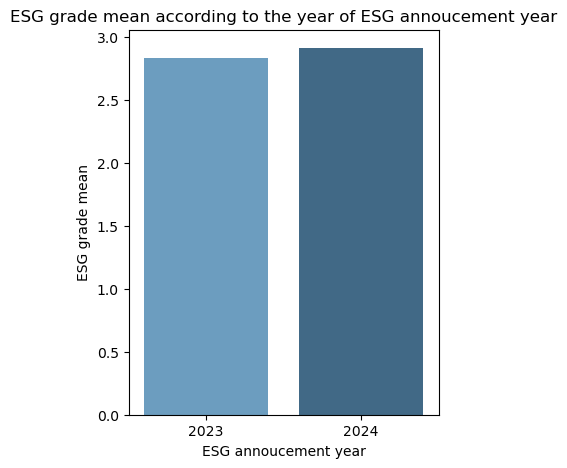

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# barplot 시각화
plt.figure(figsize=(4, 5))
sns.barplot(x="년도", y="mean", data=esg_grouped, palette="Blues_d")
plt.xlabel('ESG annoucement year')
plt.ylabel('ESG grade mean')
plt.title('ESG grade mean according to the year of ESG annoucement year')
plt.show()

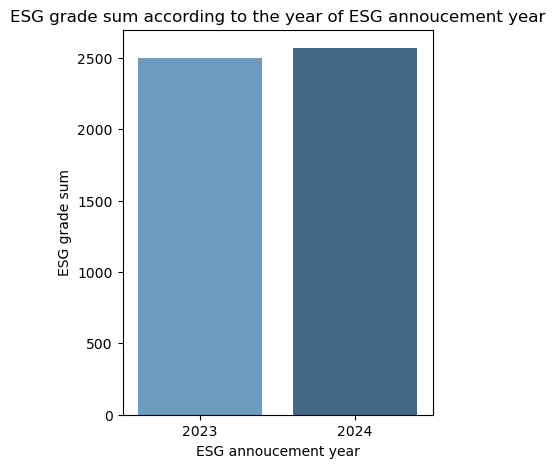

In [244]:
# barplot 시각화
plt.figure(figsize=(4, 5))
sns.barplot(x="년도", y="sum", data=esg_grouped, palette="Blues_d")
plt.xlabel('ESG annoucement year')
plt.ylabel('ESG grade sum')
plt.title('ESG grade sum according to the year of ESG annoucement year')
plt.show()

점점 ESG 중요성이 강회됨에 따라서 2023년에 비해서 2024년의 전체 기업의 ESG 등급의 평균과 합이 <br>
소폭 상승한 것을 확인할 수 있지만, 큰 차이는 없는 것으로 확인된다.

### 각 E, S, G 열별로 년도별 어느 정도로 등급의 변화가 있었는지도 확인해본다.

In [334]:
esg_environment_per_year = df_esg.groupby("년도")["환경"].agg(["mean", "sum"]).reset_index()
esg_social_per_year = df_esg.groupby("년도")["사회"].agg(["mean", "sum"]).reset_index()
esg_governance_per_year = df_esg.groupby("년도")["지배구조"].agg(["mean", "sum"]).reset_index()

In [336]:
esg_environment_per_year.head()

,년도,mean,sum
0,2023,2.872027,2536
1,2024,3.004530,2653


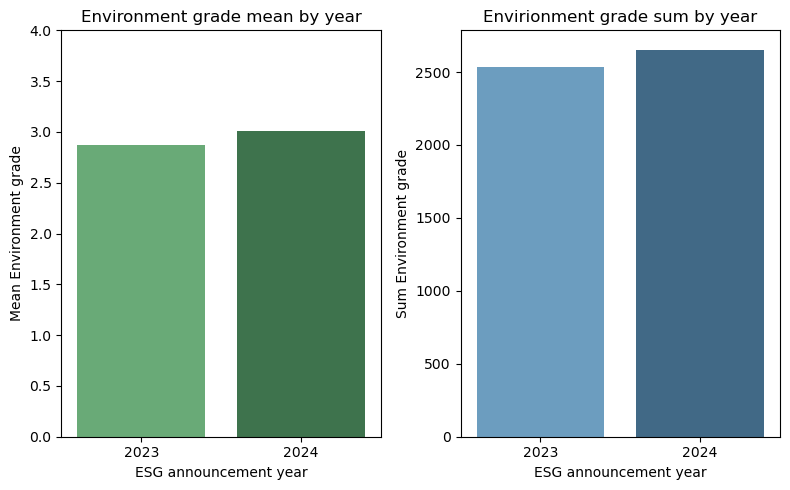

In [338]:
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # 가로로 2개

# 첫 번째 그래프: mean
sns.barplot(x="년도", y="mean", data=esg_environment_per_year, palette="Greens_d", ax=axes[0])
axes[0].set_title("Environment grade mean by year")
axes[0].set_xlabel("ESG announcement year")
axes[0].set_ylabel("Mean Environment grade")
axes[0].set_ylim(0, 4)  # 점수 범위 맞추기 (선택)

# 두 번째 그래프: sum
sns.barplot(x="년도", y="sum", data=esg_environment_per_year, palette="Blues_d", ax=axes[1])
axes[1].set_title("Envirionment grade sum by year")
axes[1].set_xlabel("ESG announcement year")
axes[1].set_ylabel("Sum Environment grade")

# 그래프 간 여백 조정
plt.tight_layout()
plt.show()

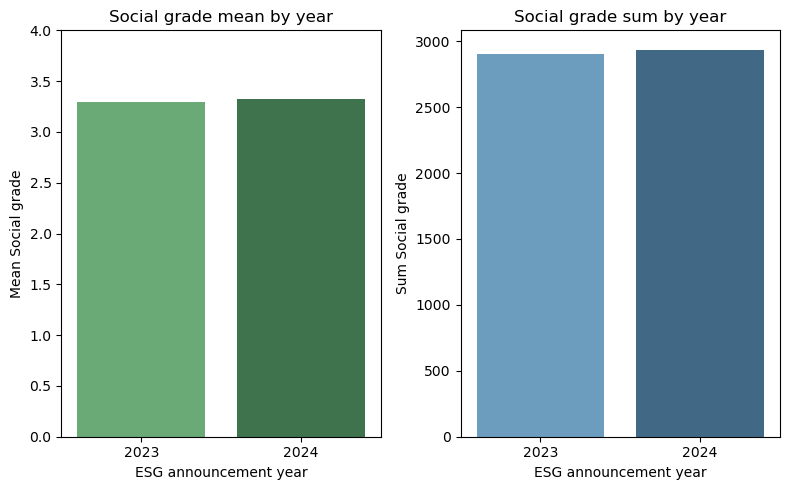

In [339]:
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # 가로로 2개

# 첫 번째 그래프: mean
sns.barplot(x="년도", y="mean", data=esg_social_per_year, palette="Greens_d", ax=axes[0])
axes[0].set_title("Social grade mean by year")
axes[0].set_xlabel("ESG announcement year")
axes[0].set_ylabel("Mean Social grade")
axes[0].set_ylim(0, 4)  # 점수 범위 맞추기 (선택)

# 두 번째 그래프: sum
sns.barplot(x="년도", y="sum", data=esg_social_per_year, palette="Blues_d", ax=axes[1])
axes[1].set_title("Social grade sum by year")
axes[1].set_xlabel("ESG announcement year")
axes[1].set_ylabel("Sum Social grade")

# 그래프 간 여백 조정
plt.tight_layout()
plt.show()

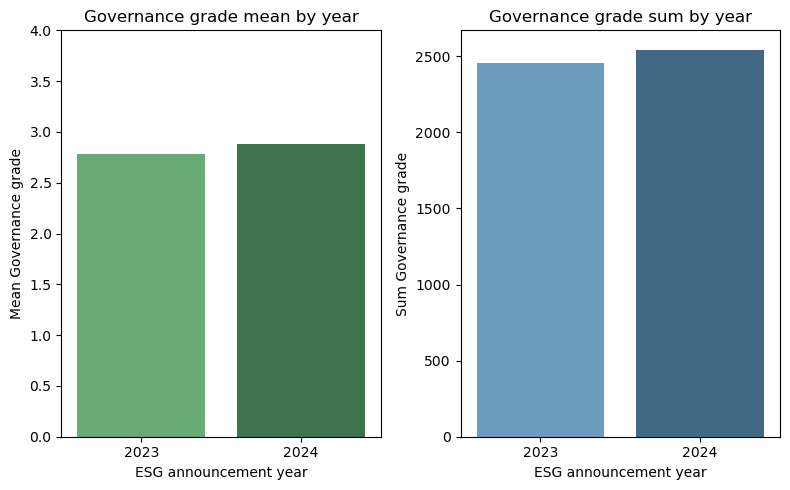

In [340]:
# 1행 2열의 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(8, 5))  # 가로로 2개

# 첫 번째 그래프: mean
sns.barplot(x="년도", y="mean", data=esg_governance_per_year, palette="Greens_d", ax=axes[0])
axes[0].set_title("Governance grade mean by year")
axes[0].set_xlabel("ESG announcement year")
axes[0].set_ylabel("Mean Governance grade")
axes[0].set_ylim(0, 4)  # 점수 범위 맞추기 (선택)

# 두 번째 그래프: sum
sns.barplot(x="년도", y="sum", data=esg_governance_per_year, palette="Blues_d", ax=axes[1])
axes[1].set_title("Governance grade sum by year")
axes[1].set_xlabel("ESG announcement year")
axes[1].set_ylabel("Sum Governance grade")

# 그래프 간 여백 조정
plt.tight_layout()
plt.show()

In [347]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 항목 리스트
categories = ["환경", "사회", "지배구조"]
category_names = {"환경": "Environment", "사회": "Social", "지배구조": "Governance"}

# 결과 저장 딕셔너리
change_results = {}

# 카테고리별로 연도별 평균, 합계 및 변화율 계산
for col in categories:
    df = df_esg.groupby("년도")[col].agg(["mean", "sum"]).reset_index()
    df["mean_pct_change"] = df["mean"].pct_change() * 100
    df["sum_pct_change"] = df["sum"].pct_change() * 100
    change_results[col] = df

# 출력
print("✅ ESG 항목별 연도별 평균 및 합계 변화율 (%):")
for col in categories:
    df = change_results[col]
    print(f"\n🔹 {category_names[col]}")
    for idx, row in df.iterrows():
        if idx == 0:
            print(f"{int(row['년도'])}년: 기준 연도")
        else:
            print(f"{int(row['년도'])}년: 평균 변화율 = {row['mean_pct_change']:.2f}%, 합계 변화율 = {row['sum_pct_change']:.2f}%")


✅ ESG 항목별 연도별 평균 및 합계 변화율 (%):

🔹 Environment
2023년: 기준 연도
2024년: 평균 변화율 = 4.61%, 합계 변화율 = 4.61%

🔹 Social
2023년: 기준 연도
2024년: 평균 변화율 = 1.00%, 합계 변화율 = 1.00%

🔹 Governance
2023년: 기준 연도
2024년: 평균 변화율 = 3.67%, 합계 변화율 = 3.67%


2023년과 2024년 ESG 등급 변화를 분석한 결과,
세 분야 모두 평균 등급이 상승한 것으로 나타났다.<br>
특히 환경(Environment) 분야는 4.61%로 가장 높은 상승률을 기록했으며,
그다음은 지배구조(Governance) 3.67%, 사회(Social) 1.00% 순이었다.<br>
이러한 차이는 각 ESG 항목의 내재적 특성 차이를 반영한 것으로 해석된다.<br><br>

환경(E) 항목은 온실가스 배출량, 재활용률 등 정량적 지표를 중심으로 평가되므로,
관리와 개선이 상대적으로 용이하고, 단기간 내 등급 향상이 가능한 구조를 갖는다.<br>
지배구조(Governance)는 이사회 구성, 감사제도 등 제도 기반 요소로 구성되어 있어
구조적 개편을 통해 점진적인 개선이 가능한 분야다.<br>
반면 사회(Social) 항목은 노동, 안전, 인권, 다양성, 윤리 등
정성적 요소가 많아 개선 속도가 느리고,
특히 중대재해처벌법 시행 이후 노동 관련 평가 기준이 더욱 엄격해지면서
등급 상승 폭이 제한된 것으로 보인다.<br>

즉, 모든 분야에서 등급은 상승했지만,
그 폭의 차이는 각 요소의 측정 구조와 개선 용이성의 차이를 잘 보여준다.

이러한 결과는 ESG 경영에 있어 항목별 전략적 접근이 필요함을 시사한다.
환경과 지배구조는 단기적인 성과 개선이 가능하고,
외부 평가에도 빠르게 반응하는 특성을 지니므로
기업 입장에서 단기 ESG 성과 제고의 주요 타깃이 될 수 있다.

반면, 사회 항목은 낮은 상승률이 단순한 성과 부진이 아니라
정성적 복잡성과 평가 기준의 엄격성에 기인한 것임을 고려해야 한다.
따라서 해당 영역은 지속가능한 조직문화 정착과 내부 시스템 강화라는
중장기적 접근 전략이 필요한 분야다.

요컨대, 기업이 ESG 평가에서 단기 성과를 목표로 할 경우
환경(E)과 지배구조(G)에 우선순위를 둘 수 있지만,
사회(S) 항목은 지속가능성의 핵심 축으로서
장기적 경쟁력을 확보하기 위한 전략적이고 진정성 있는 대응이 병행되어야 한다.

# 위 내용은 가설 2에서 사용한다.

# 가설1: ESG 점수의 변화는 해당 기업의 주가에 유의미한 영향을 미칠 것이다.

> ESG(환경·사회·지배구조) 점수는 기업의 지속가능성과 리스크 관리 역량을 정량적으로 평가한 지표로,<br>
> 최근 금융기관, 기관 투자자, 자산운용사 등에서 중요한 투자 판단 기준으로 광범위하게 활용되고 있다.<br>
> 본 분석에서는 ESG 점수의 변화가 실제로 주가에 미치는 영향을 실증적으로 검증하고자 한다.<br>
> 구체적으로, ESG 등급 발표일(2024년 10월 25일)을 기준으로 전후 5거래일의 종가 평균을 비교하여<br>
> 등급이 상승·하락한 기업들의 주가 반응을 통계적으로 분석한다.<br>
>
> 이를 통해 다음과 같은 핵심 인사이트를 도출하고자 한다.<br>
>
> - ESG 점수의 변동이 단기적으로 주가에 얼마나 영향을 미치는가?<br>
> - 등급이 상승한 기업은 실제로 주가가 우상향하는 경향이 있는가?<br>
> - 반대로, 등급이 하락한 기업은 부정적 시장 반응(주가 하락)을 겪는가?<br>
>
> 나아가, ESG 등급 관리는 기업가치 제고의 실질적 수단이 될 수 있는지,<br>
> 그리고 ESG 정보공시의 전략적 중요성에 대해 정량 기반으로 해석하고자 한다.

먼저 ESG 등급이 상승한 기업과 하락한 기업들을 확인하고 해당 기업들을 2개의 데이터 프레임으로 분리한다.<br>
이후 기업명이 년도별로 나누어져 있으므로 중복된 기업명을 하나로 줄인다.<br>

In [359]:
df_esg.head()

,기업명,ESG등급,환경,사회,지배구조,년도,ESG 등급 발표 전,ESG 등급 발표 후,종가 변화율(%)
0,AJ네트웍스,4,2,5,4,2023,4836.0,4893.0,1.18
1,AJ네트웍스,4,2,5,4,2024,4836.0,4893.0,1.18
2,AK홀딩스,5,5,6,4,2023,12840.0,12310.0,-4.13
3,AK홀딩스,5,5,6,4,2024,12840.0,12310.0,-4.13
4,BGF,5,5,6,4,2023,3618.0,3573.0,-1.24


In [361]:
df_esg["종가 변화율(%)"] = ((df_esg["ESG 등급 발표 후"] - df_esg["ESG 등급 발표 전"]) 
                       / df_esg["ESG 등급 발표 전"]) * 100

df_esg["종가 변화율(%)"] = df_esg["종가 변화율(%)"].round(2)  # 소수 둘째 자리까지

In [363]:
df_esg.head()

,기업명,ESG등급,환경,사회,지배구조,년도,ESG 등급 발표 전,ESG 등급 발표 후,종가 변화율(%)
0,AJ네트웍스,4,2,5,4,2023,4836.0,4893.0,1.18
1,AJ네트웍스,4,2,5,4,2024,4836.0,4893.0,1.18
2,AK홀딩스,5,5,6,4,2023,12840.0,12310.0,-4.13
3,AK홀딩스,5,5,6,4,2024,12840.0,12310.0,-4.13
4,BGF,5,5,6,4,2023,3618.0,3573.0,-1.24


In [365]:
# 2023년과 2024년 데이터를 나눔
df_2023 = df_esg[df_esg["년도"] == 2023].copy()
df_2024 = df_esg[df_esg["년도"] == 2024].copy()

# 기업명 기준으로 병합 (2023 vs 2024 비교용)
df_compare = pd.merge(df_2023[["기업명", "ESG등급"]], 
                      df_2024[["기업명", "ESG등급"]], 
                      on="기업명", suffixes=("_2023", "_2024"))

# 변화량 열 추가
df_compare["등급변화"] = df_compare["ESG등급_2024"] - df_compare["ESG등급_2023"]

# 종가 변화율만 따로 추출
change_col = df_esg[df_esg["년도"] == 2024][["기업명", "종가 변화율(%)"]].copy()

# 기업명을 기준으로 병합
df_compare = df_compare.merge(change_col, on="기업명", how="left")

# 등급 상승 / 하락 기업 분리
df_grade_increase = df_compare[df_compare["등급변화"] > 0]
df_grade_decrease = df_compare[df_compare["등급변화"] < 0]


In [367]:
df_compare.head()

,기업명,ESG등급_2023,ESG등급_2024,등급변화,종가 변화율(%)
0,AJ네트웍스,4,4,0,1.18
1,AK홀딩스,5,5,0,-4.13
2,BGF,5,5,0,-1.24
3,BGF리테일,5,5,0,-0.25
4,BNK금융지주,5,5,0,0.58


In [369]:
df_grade_increase

,기업명,ESG등급_2023,ESG등급_2024,등급변화,종가 변화율(%)
8,CJ ENM,4,5,1,0.06
9,CJ 바이오사이언스,2,4,2,-7.60
22,DSR,1,2,1,-3.90
25,F&F,4,5,1,-3.96
26,GKL,4,5,1,1.56
...,...,...,...,...,...
850,현대이지웰,5,6,1,6.63
858,현대홈쇼핑,5,6,1,-0.65
863,화승알앤에이,3,4,1,-6.57
865,화승코퍼레이션,3,4,1,-0.77


In [371]:
df_grade_increase.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, 8 to 879
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기업명         187 non-null    object 
 1   ESG등급_2023  187 non-null    int64  
 2   ESG등급_2024  187 non-null    int64  
 3   등급변화        187 non-null    int64  
 4   종가 변화율(%)   187 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 8.8+ KB


In [373]:
df_grade_increase.describe()

,ESG등급_2023,ESG등급_2024,등급변화,종가 변화율(%)
count,187.000000,187.000000,187.000000,187.000000
mean,2.577540,3.770053,1.192513,-0.708717
std,1.310884,1.305720,0.408706,5.636135
min,1.000000,2.000000,1.000000,-12.820000
25%,1.000000,2.500000,1.000000,-3.115000
50%,2.000000,4.000000,1.000000,-1.350000
75%,4.000000,5.000000,1.000000,0.440000
max,5.000000,6.000000,3.000000,45.490000


등급이 상승한 기업은 187개의 기업이 있으며 평균적으로 1.7정도의 상승을 하였다.<br>
최대로는 4정도로 높게 등급이 상승하였다.

In [376]:
df_grade_decrease

,기업명,ESG등급_2023,ESG등급_2024,등급변화,종가 변화율(%)
17,DB하이텍,4,2,-2,-2.07
31,HDC,4,2,-2,0.18
37,HD현대건설기계,6,5,-1,-7.20
48,HLB생명과학,3,2,-1,-3.12
58,JYP Ent.,4,3,-1,-2.50
...,...,...,...,...,...
873,효성중공업,5,4,-1,0.20
874,효성티앤씨,5,4,-1,0.56
876,후성,4,3,-1,-0.23
877,휴비스,5,4,-1,-4.92


In [378]:
df_grade_decrease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 17 to 880
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기업명         142 non-null    object 
 1   ESG등급_2023  142 non-null    int64  
 2   ESG등급_2024  142 non-null    int64  
 3   등급변화        142 non-null    int64  
 4   종가 변화율(%)   142 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 6.7+ KB


In [380]:
df_grade_decrease.describe()

,ESG등급_2023,ESG등급_2024,등급변화,종가 변화율(%)
count,142.000000,142.000000,142.000000,142.000000
mean,3.225352,2.169014,-1.056338,-0.850986
std,1.390925,1.373363,0.231390,3.272755
min,2.000000,1.000000,-2.000000,-9.710000
25%,2.000000,1.000000,-1.000000,-2.575000
50%,3.000000,2.000000,-1.000000,-0.935000
75%,4.000000,3.000000,-1.000000,0.560000
max,6.000000,5.000000,-1.000000,12.950000


등급이 하락한 기업은 142개의 기업이 있으며 평균적으로 -1.7정도의 하락을 하였다.<br>
최대로는 -3정도로 높게 등급이 하락하였다.

이제 T test를 통해서 두 그룹간에 유의미하게 주가의 변화에 차이가 있는지를 확인해볼 것이다.

In [384]:
from scipy.stats import ttest_ind

# Welch’s t-test (unequal variances) 두 집단의 샘플 수가 다르기에 Welch's t-test를 사용하였다.
t_stat, p_value = ttest_ind(df_grade_increase['종가 변화율(%)'], df_grade_decrease['종가 변화율(%)'], equal_var=False)

print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

t-statistic: 0.287, p-value: 0.7741


In [386]:
print("상승 그룹 수:", len(df_grade_increase))
print("하락 그룹 수:", len(df_grade_decrease))


상승 그룹 수: 187
하락 그룹 수: 142


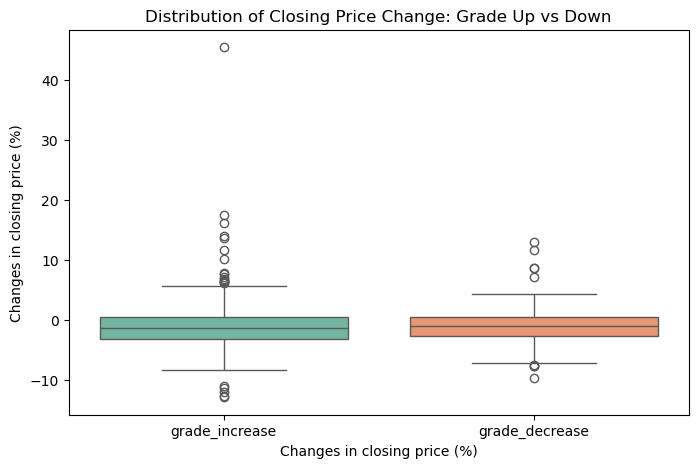

t-statistic: 0.287, p-value: 0.7741


In [388]:
import pandas as pd

# 각 시리즈에 그룹 라벨 부여
increase = df_grade_increase[['기업명', '종가 변화율(%)']].copy()
increase['등급변화'] = '등급 상승'

decrease = df_grade_decrease[['기업명', '종가 변화율(%)']].copy()
decrease['등급변화'] = '등급 하락'

df_box = pd.concat([increase, decrease])

# 박스플롯 (long-format)
plt.figure(figsize=(8, 5))
sns.boxplot(x='등급변화', y='종가 변화율(%)', data=df_box, palette="Set2")
plt.title('Distribution of Closing Price Change: Grade Up vs Down')
plt.xticks([0, 1], ['grade_increase', 'grade_decrease'])
plt.xlabel("Changes in closing price (%)")
plt.ylabel("Changes in closing price (%)")
plt.show()

print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

ESG 등급이 상승한 기업군과 하락한 기업군 간의 종가 변화율을 비교한 결과,
두 집단의 평균값은 시각적으로 유의미한 차이를 보이지 않았다.<br>
추가로 수행한 Welch's t-test에서도 p-value가 0.7741로 유의수준 0.05를 크게 초과하여,
두 집단 간 종가 변화율의 평균 차이가 통계적으로 유의미하지 않음을 확인할 수 있었다.<br>

이는 ESG 등급의 단기 변동이 투자자들의 주가 반응에 즉각적이고 결정적인 영향을 미치지 않았음을 시사한다.
실제로 ESG 정보는 그 특성상 장기적 지속가능성의 척도로 간주되며,<br>
투자자들이 이를 반영하는 시점과 방식은 산업군별, 정보공시 채널, 시장 상황 등에 따라 달라질 수 있다.

또한 ESG 등급 자체가 등급평가기관의 내부 기준에 따라 상대평가 또는 정성적 요소에 의해 부여되기 때문에,<br>
실제 시장 참여자들 사이에서 등급 변동의 신뢰도나 민감도가 충분히 확보되지 않았을 가능성도 존재한다.

요약하자면, 단기 시계열 기준의 ESG 등급 변화는 주가 변화율과 유의한 상관관계를 갖지 않았다는 분석 결과는,<br>
ESG 등급 자체보다도 어떻게 공시되고 해석되며, 시장에 전달되는지의 맥락이 중요함을 보여주는 시사점을 제공한다.

In [390]:
increase

,기업명,종가 변화율(%),등급변화
8,CJ ENM,0.06,등급 상승
9,CJ 바이오사이언스,-7.60,등급 상승
22,DSR,-3.90,등급 상승
25,F&F,-3.96,등급 상승
26,GKL,1.56,등급 상승
...,...,...,...
850,현대이지웰,6.63,등급 상승
858,현대홈쇼핑,-0.65,등급 상승
863,화승알앤에이,-6.57,등급 상승
865,화승코퍼레이션,-0.77,등급 상승


In [392]:
df_box

,기업명,종가 변화율(%),등급변화
8,CJ ENM,0.06,등급 상승
9,CJ 바이오사이언스,-7.60,등급 상승
22,DSR,-3.90,등급 상승
25,F&F,-3.96,등급 상승
26,GKL,1.56,등급 상승
...,...,...,...
873,효성중공업,0.20,등급 하락
874,효성티앤씨,0.56,등급 하락
876,후성,-0.23,등급 하락
877,휴비스,-4.92,등급 하락


## 가설 2: ESG 등급에는 E, S, G 중 E가 가장 등급의 결정에 중요도가 있을 것이다. 
## 왜냐하면 E 요소가 가장 기업 차원에서 변화를 주기 좋은 요소이기 때문이다. 
## 더불어 E, S, G별 특성에 따라서 등급 변화양상에 차이가 있을 것이다.

In [401]:
df_esg.head()

,기업명,ESG등급,환경,사회,지배구조,년도,ESG 등급 발표 전,ESG 등급 발표 후,종가 변화율(%)
0,AJ네트웍스,4,2,5,4,2023,4836.0,4893.0,1.18
1,AJ네트웍스,4,2,5,4,2024,4836.0,4893.0,1.18
2,AK홀딩스,5,5,6,4,2023,12840.0,12310.0,-4.13
3,AK홀딩스,5,5,6,4,2024,12840.0,12310.0,-4.13
4,BGF,5,5,6,4,2023,3618.0,3573.0,-1.24


In [405]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# X: 독립 변수 / y: 종속 변수
X = df_esg[["환경", "사회", "지배구조"]]
y = df_esg["ESG등급"]  # 이 값은 반드시 수치형이어야 함! (예: A=5, B+=4, ..., C=1)

# 선형 회귀 모델 학습
model = LinearRegression().fit(X, y)

# 예측값 생성
y_pred = model.predict(X)

# 결과 출력
print("회귀계수 (중요도):", model.coef_)
print("절편 (intercept):", model.intercept_)
print("설명력 (R^2 score):", r2_score(y, y_pred))


회귀계수 (중요도): [0.24616748 0.26154848 0.53869299]
절편 (intercept): -0.24343204256019035
설명력 (R^2 score): 0.9621009962998447


In [409]:
print(df_esg[["ESG등급", "환경", "사회", "지배구조"]].corr())

          ESG등급        환경        사회      지배구조
ESG등급  1.000000  0.882972  0.900570  0.898957
환경     0.882972  1.000000  0.891679  0.685461
사회     0.900570  0.891679  1.000000  0.705641
지배구조   0.898957  0.685461  0.705641  1.000000


In [411]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_esg[["환경", "사회", "지배구조"]])

model_std = LinearRegression().fit(X_scaled, y)
print("표준화 후 회귀계수:", model_std.coef_)
print("절편 (intercept):", model.intercept_)
print("설명력 (R^2 score):", r2_score(y, y_pred))print("절편 (intercept):", model.intercept_)
print("설명력 (R^2 score):", r2_score(y, y_pred))

표준화 후 회귀계수: [0.39644321 0.50573292 0.7749102 ]


# 선형 회귀 모델 말고 랜덤 포레스트 회귀 모델로도 피쳐별 중요도를 확인해본다.

In [416]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1. 독립 변수 (표준화 안 해도 됨)
X = df_esg[["환경", "사회", "지배구조"]]
y = df_esg["ESG등급"]  # 수치화된 등급

# 2. 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=1013)
rf_model.fit(X, y)

# 3. 예측 및 성능
y_pred_rf = rf_model.predict(X)
print("설명력 (R^2 score):", r2_score(y, y_pred_rf))

# 4. 변수 중요도 출력
importances = rf_model.feature_importances_
features = X.columns

for name, importance in zip(features, importances):
    print(f"{name} 중요도: {importance:.4f}")


설명력 (R^2 score): 0.9902518463816857
환경 중요도: 0.0453
사회 중요도: 0.7401
지배구조 중요도: 0.2146


In [426]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. 변수 설정
X = df_esg[["환경", "사회", "지배구조"]]
y = df_esg["ESG등급"]  # 수치화된 등급이어야 함

# 2. Train/Test 분할 (예: 80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1013)

# 3. 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=1013)
rf_model.fit(X_train, y_train)

# 4. 예측 및 평가
y_pred = rf_model.predict(X_test)
print("Test 데이터 기준 설명력 (R^2 score):", r2_score(y_test, y_pred))

# 5. 변수 중요도 출력
importances = rf_model.feature_importances_
features = X.columns

print("\n📊 변수 중요도 (Random Forest 기준):")
for name, importance in zip(features, importances):
    print(f"{name}: {importance:.4f}")


# MAE, MSE, RMSE 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 결과 출력
print("📊 회귀 평가 지표:")
print(f"✅ MAE (Mean Absolute Error): {mae:.4f}")
print(f"✅ MSE (Mean Squared Error): {mse:.4f}")
print(f"✅ RMSE (Root Mean Squared Error): {rmse:.4f}")

Test 데이터 기준 설명력 (R^2 score): 0.9840116458846656

📊 변수 중요도 (Random Forest 기준):
환경: 0.0585
사회: 0.7377
지배구조: 0.2037
📊 회귀 평가 지표:
✅ MAE (Mean Absolute Error): 0.0699
✅ MSE (Mean Squared Error): 0.0388
✅ RMSE (Root Mean Squared Error): 0.1971


In [428]:
print(df_esg[["ESG등급", "환경", "사회", "지배구조"]].corr())

          ESG등급        환경        사회      지배구조
ESG등급  1.000000  0.882972  0.900570  0.898957
환경     0.882972  1.000000  0.891679  0.685461
사회     0.900570  0.891679  1.000000  0.705641
지배구조   0.898957  0.685461  0.705641  1.000000


Permutation Importance 분석 결과, 지배구조(G)가 ESG 등급 예측에 가장 큰 영향력을 가지며,
사회(S)는 중간 수준, 환경(E)은 상대적으로 낮은 영향력을 보였다.
이는 ESG 등급 산정 구조에서 G가 신뢰 기반을, S가 보완적 신호를, E가 기초 요건을 구성하는
기능적 분화 구조를 이루고 있음을 시사한다.
따라서 기업은 단기적인 등급 개선을 위해 G 강화를 우선 전략으로 삼되,
지속 가능성과 장기 신뢰 확보를 위해 S의 내재화된 관리체계를 병행 구축해야 한다.

## 가설 3: ESG 등급 별로 클러스터링을 한다면 대기업, 중소기업 순으로 나뉘게 될 것이다. 왜냐하면 대기업이 더 ESG 점수를 잘 챙길 수 있는 환경이 조성될 수 있기 때문이다.

> 보통 대기업이 ESG 점수 관리를 잘하는 경향이 있다. 왜냐하면 더 체계가 잡혀져있고,
> 자본력으로 컨설팅을 맡기는 등 관리할 수 있는 방안을 잘 마련할 수 있기 때문이다.
> 반면 중소기업이나, 스타트업 같은 경우에는 ESG 점수를 관리하기 어려울 확률이 높다.
> 그렇기에 분석해본다.

In [483]:
df_esg

,기업명,ESG등급,환경,사회,지배구조,년도,ESG 등급 발표 전,ESG 등급 발표 후,종가 변화율(%)
0,AJ네트웍스,4,2,5,4,2023,4836.0,4893.0,1.18
1,AJ네트웍스,4,2,5,4,2024,4836.0,4893.0,1.18
2,AK홀딩스,5,5,6,4,2023,12840.0,12310.0,-4.13
3,AK홀딩스,5,5,6,4,2024,12840.0,12310.0,-4.13
4,BGF,5,5,6,4,2023,3618.0,3573.0,-1.24
...,...,...,...,...,...,...,...,...,...
1863,휴젤,2,2,2,3,2024,282700.0,271300.0,-4.03
1864,흥국화재,4,3,4,4,2023,3399.0,3420.0,0.62
1865,흥국화재,4,2,4,4,2024,3399.0,3420.0,0.62
1866,흥아해운,3,3,4,3,2023,2007.6,1911.8,-4.77


In [493]:
df_esg_unique = df_esg.sort_values("년도", ascending=False).drop_duplicates(subset="기업명", keep="first")

In [495]:
# 1. 평균값 열 생성
df_esg_unique["기업 종가"] = df_esg_unique[["ESG 등급 발표 전", "ESG 등급 발표 후"]].mean(axis=1)

# 2. 원래 두 열 제거
df_esg_unique = df_esg_unique.drop(columns=["ESG 등급 발표 전", "ESG 등급 발표 후"], errors="ignore")


In [503]:
df_esg_unique

,기업명,ESG등급,환경,사회,지배구조,년도,종가 변화율(%),기업 종가
911,세진중공업,2,2,1,2,2024,-5.10,7268.0
989,씨에스윈드,5,5,4,5,2024,-2.63,57770.0
1025,아주스틸,1,2,1,1,2024,-2.41,5086.0
1023,아주IB투자,3,2,5,3,2024,-1.01,1981.7
1021,아이티엠반도체,4,4,5,3,2024,-0.24,18452.0
...,...,...,...,...,...,...,...,...
523,더존비즈온,2,2,1,2,2024,15.79,51865.0
49,E1,5,5,6,4,2024,0.08,74810.0
587,동화기업,1,1,2,1,2024,-3.43,11297.0
295,TYM,4,4,5,3,2024,-0.48,3092.5


In [505]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. 사용할 변수 선택
X = df_esg_unique[["환경", "사회", "지배구조"]]

df_esg_clusters = df_esg_unique.copy()  # 원본 복사

# 2. 표준화 (KMeans는 거리 기반이므로 꼭 필요함)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans 클러스터링 (n_clusters=3)
kmeans = KMeans(n_clusters=3, random_state=1013)
clusters = kmeans.fit_predict(X_scaled)

# 4. 클러스터 결과를 원본 데이터에 추가
df_esg_clusters["ESG_클러스터"] = clusters


In [513]:
# 클러스터별 평균 ESG 특성
cluster_summary = df_esg_clusters.groupby("ESG_클러스터")[["환경", "사회", "지배구조", "ESG등급", "기업 종가"]].mean()
cluster_summary

,환경,사회,지배구조,ESG등급,기업 종가
ESG_클러스터,,,,,
0,1.631268,1.454277,1.392330,1.321534,15524.984661
1,4.611111,5.292929,4.032828,4.459596,61729.886111
2,1.851351,2.344595,3.202703,2.405405,27069.843919


이 결과를 봤을 때 확실히 각 분양별 ESG 등급이 높은 기업들일 수록 기업 종가도 높은 것을 확인할 수 있다.<br>
나의 가설대로 규모가 있는(종가가 높은) 기업일수록 ESG 등급을 잘 관리하는 것을 확인할 수 있다.

In [519]:
# 클러스터별로 개별 데이터프레임 생성
cluster_0 = df_esg_clusters[df_esg_clusters["ESG_클러스터"] == 0]
cluster_1 = df_esg_clusters[df_esg_clusters["ESG_클러스터"] == 1]
cluster_2 = df_esg_clusters[df_esg_clusters["ESG_클러스터"] == 2]

In [521]:
cluster_0.describe()

,ESG등급,환경,사회,지배구조,년도,종가 변화율(%),기업 종가,ESG_클러스터
count,339.000000,339.000000,339.000000,339.000000,339.0,339.000000,339.000000,339.0
mean,1.321534,1.631268,1.454277,1.392330,2024.0,-0.542655,15524.984661,0.0
std,0.467756,0.645670,0.776964,0.488991,0.0,8.022431,32756.145542,0.0
min,1.000000,1.000000,1.000000,1.000000,2024.0,-33.900000,269.000000,0.0
25%,1.000000,1.000000,1.000000,1.000000,2024.0,-3.190000,1603.850000,0.0
50%,1.000000,2.000000,1.000000,1.000000,2024.0,-1.060000,4848.500000,0.0
75%,2.000000,2.000000,2.000000,2.000000,2024.0,0.495000,13489.000000,0.0
max,2.000000,4.000000,5.000000,2.000000,2024.0,86.540000,321850.000000,0.0


In [523]:
cluster_1.describe()

,ESG등급,환경,사회,지배구조,년도,종가 변화율(%),기업 종가,ESG_클러스터
count,396.000000,396.000000,396.000000,396.000000,396.0,396.000000,3.960000e+02,396.0
mean,4.459596,4.611111,5.292929,4.032828,2024.0,-0.757929,6.172989e+04,1.0
std,0.827308,0.743088,0.746333,1.048897,0.0,4.776137,1.122437e+05,0.0
min,2.000000,2.000000,2.000000,1.000000,2024.0,-13.430000,5.054000e+02,1.0
25%,4.000000,4.000000,5.000000,4.000000,2024.0,-2.902500,8.891250e+03,1.0
50%,5.000000,5.000000,5.000000,4.000000,2024.0,-1.040000,2.289250e+04,1.0
75%,5.000000,5.000000,6.000000,5.000000,2024.0,0.675000,6.450250e+04,1.0
max,6.000000,6.000000,6.000000,6.000000,2024.0,45.490000,1.049400e+06,1.0


In [525]:
cluster_2.describe()

,ESG등급,환경,사회,지배구조,년도,종가 변화율(%),기업 종가,ESG_클러스터
count,148.000000,148.000000,148.000000,148.000000,148.0,148.000000,148.000000,148.0
mean,2.405405,1.851351,2.344595,3.202703,2024.0,-1.209595,27069.843919,2.0
std,0.592904,0.759205,1.238349,0.679730,0.0,3.256244,57503.807350,0.0
min,2.000000,1.000000,1.000000,2.000000,2024.0,-11.990000,434.700000,2.0
25%,2.000000,1.000000,1.000000,3.000000,2024.0,-3.077500,4378.375000,2.0
50%,2.000000,2.000000,2.000000,3.000000,2024.0,-1.365000,8717.500000,2.0
75%,3.000000,2.000000,3.000000,4.000000,2024.0,0.255000,20893.750000,2.0
max,4.000000,4.000000,5.000000,5.000000,2024.0,13.870000,382650.000000,2.0


기업 종가의 평균은 클러스터 1 > 2 > 0 순이다.<br>
그런데 클러스터 1에서도 기업종가가 최저로 낮은 값은 약 500원대의 값이 있고<br>
클러스터 0에서도 기업종가가 최대로 높은 값은 약 321850원의 값이 있다.<br>
클러스터별로 종가 순으로 정렬하여 해당 기업들에는 어떤 기업들이 있으며 기업의 특성 및 사건들이 있었는지 확인해보자.

In [533]:
cluster_1_sorted = cluster_1.sort_values(by="기업 종가", ascending=True)
display(cluster_1_sorted.head(10))

,기업명,ESG등급,환경,사회,지배구조,년도,종가 변화율(%),기업 종가,ESG_클러스터
265,SK증권,4,5,4,4,2024,0.64,505.4,1
1703,한솔홈데코,4,4,3,4,2024,-2.91,704.0,1
753,사조동아원,3,4,5,2,2024,1.30,1034.1,1
965,신원,4,3,5,4,2024,2.27,1240.3,1
1687,한세엠케이,4,4,4,4,2024,6.47,1620.0,1
1165,웅진씽크빅,3,3,6,2,2024,0.91,1737.1,1
1829,화승코퍼레이션,4,4,4,4,2024,-0.77,1883.7,1
723,벽산,4,4,4,3,2024,-1.34,2006.3,1
687,무림페이퍼,4,5,4,4,2024,0.29,2058.0,1
1499,태림포장,3,4,6,2,2024,-5.34,2094.5,1


In [535]:
cluster_0_sorted = cluster_0.sort_values(by="기업 종가", ascending=False)
display(cluster_0_sorted.head(10))

,기업명,ESG등급,환경,사회,지배구조,년도,종가 변화율(%),기업 종가,ESG_클러스터
1625,한국쉘석유,1,1,1,2,2024,0.47,321850.0,0
703,미원상사,2,2,1,2,2024,-0.95,199410.0,0
651,리노공업,1,2,1,1,2024,-3.64,184030.0,0
1101,엔켐,1,2,2,1,2024,-1.89,180440.0,0
1243,이오테크닉스,1,2,1,1,2024,1.12,169360.0,0
1087,에코프로비엠,2,3,4,1,2024,3.79,165740.0,0
507,대한제분,2,2,2,2,2024,-2.44,134990.0,0
825,삼천당제약,1,2,1,1,2024,-3.37,132410.0,0
1445,코스모신소재,2,2,1,2,2024,-2.06,105580.0,0
1673,한미반도체,1,1,1,1,2024,-9.21,99650.0,0
